**Business Objective:**
The goal of this project is to find which customers are most likely to stop using an e-commerce platform.
By analyzing customer behavior, payments, and satisfaction, we can help the company improve retention.

# EXPLORATORY DATA ANALYSIS

# Phase-1 : Dataset Overview(Inspection)

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel("C:\\Users\\ravit\\Desktop\\E Commerce Dataset.xlsx",sheet_name="E Comm")
print(df.head())
print(df.shape,df.columns,sep='\n')
#basic information
print(df.info()) #we can ignore a method dtypes cause its included in here in info()
print(df.describe())
print(df.isnull().sum())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

#Summary – Phase 1: Data Overview

• Dataset Shape: (5630 rows, 20 columns)  
• Target Column: Churn (0 = stayed, 1 = left)  

• Missing Values:
  - Tenure: 264  
  - WarehouseToHome: 251  
  - HourSpendOnApp: 255  
  - OrderAmountHikeFromlastYear: 265  
  - CouponUsed: 256  
  - OrderCount: 258  
  - DaySinceLastOrder: 307  
  → Plan: Fill numeric columns with median, categorical with mode.  

• Key Stats:
  - Average Tenure: 10.18 months  
  - Average SatisfactionScore: 3.06 / 5  
  - Customers with Complaints: 28%  
  - Average CashbackAmount: ₹177.22  
  - Average Orders per Customer: 3  

**identifying type of columns(categorical and numerical)**

In [3]:
#numerical columns
num_cols=df.select_dtypes(include=['int64','float64']).columns.to_list()
cat_cols=df.select_dtypes(include=['object']).columns.tolist()


• Total Numerical Columns: 14  
  ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 
   'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
   'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 
   'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

• Total Categorical Columns: 6  
  ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 
   'PreferedOrderCat', 'MaritalStatus']

→ Numerical columns include all measurable attributes like Tenure, CashbackAmount, etc.  
→ Categorical columns represent non-numeric attributes like Device, Payment Mode, Gender, etc.


# phase-2 Data cleaning

In [4]:
#drop irrelevent columns
df.drop(columns=['CustomerID'],inplace=True)#inplace represents do the operationon the orignal dataset itself not any new one
#we also make sure to drop or remove it from numerical column list
num_cols.remove('CustomerID')


• Dropped Column: 'CustomerID'  
  Reason: It’s just an identifier and has no predictive value.  

• Updated Numerical Columns Count: 13  
  'CustomerID' removed from the numerical columns list.  



here we don't need to convert the churn column (categorical into numerical here its already a nuumerical)

In [5]:
#handling missing values
for i in num_cols:
    df.fillna(df[i].median(),inplace=True)
for i in cat_cols:
    df.fillna(df[i].mode(),inplace=True)

In [6]:
#checking for duplicates
print("Duplicated rows:",df.duplicated().sum())
#if any,drop them
df.drop_duplicates(inplace=True)

Duplicated rows: 556


In [7]:
# Fix inconsistent category labels
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({
    'Phone': 'Mobile Phone'
})
print(df['PreferredLoginDevice'].value_counts())

# Standardize payment mode labels
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery'
})
print(df['PreferredPaymentMode'].value_counts())


PreferredLoginDevice
Mobile Phone    3617
Computer        1457
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2099
Credit Card         1596
E wallet             562
Cash on Delivery     457
UPI                  360
Name: count, dtype: int64


In [8]:
#validate Data types
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [9]:
# final check after cleaning
print(df.isnull().sum())
print(df.shape)
df.head()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64
(5074, 19)


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,0.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Phase-3 Visual EDA(why customers leave?)
**factors affecting churn**

Objective:
Understand the relationships, patterns, and hidden signals in your cleaned e-commerce churn data.

📘 Chapter 1 — How bad is churn overall?

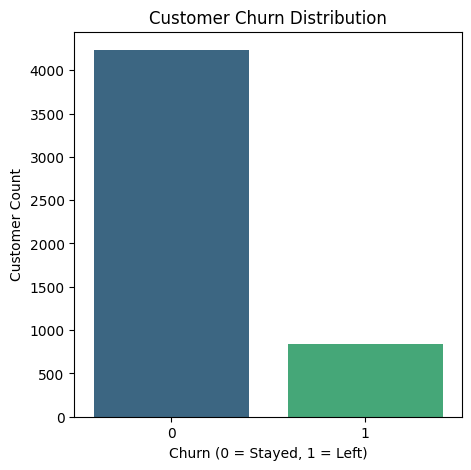

Churn Rate (%):
Churn
0    83.425305
1    16.574695
Name: proportion, dtype: float64


In [10]:
#“Out of all our customers, how many are actually leaving?”
plt.figure(figsize=(5,5))
sns.countplot(x='Churn', data=df, hue='Churn', palette='viridis', legend=False)

plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Customer Count")
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)


Chapter -2 Who leaves earlier (tenure vs Churn)(to maintain feature-target relation)

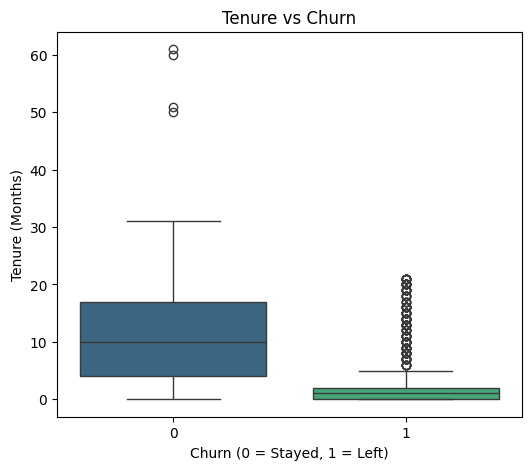

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Churn', y='Tenure', hue='Churn', palette='viridis', legend=False)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Tenure (Months)")
plt.show()


📘 Chapter 3

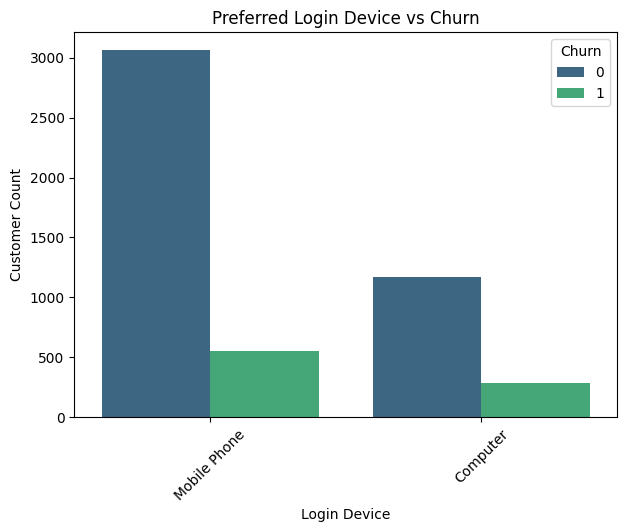

In [12]:
#A — Preferred Login Device vs Churn
plt.figure(figsize=(7,5))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df, palette='viridis')
plt.title("Preferred Login Device vs Churn")
plt.xlabel("Login Device")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()


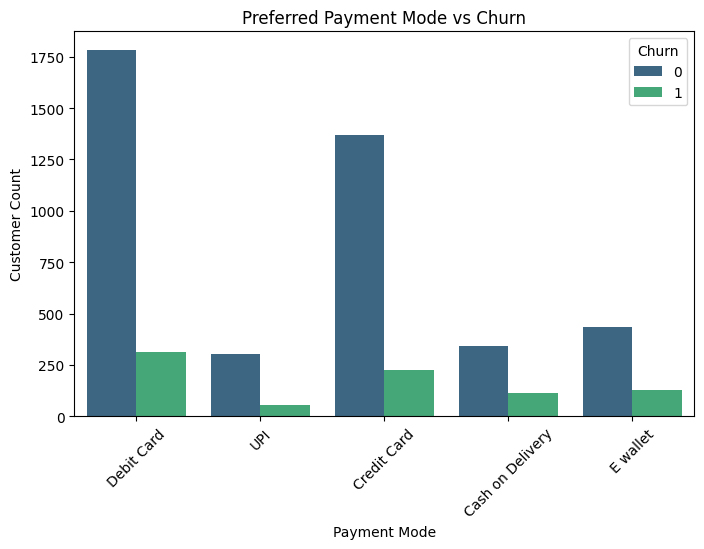

In [13]:
# B — Preferred Payment Mode vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df, palette='viridis')
plt.title("Preferred Payment Mode vs Churn")
plt.xlabel("Payment Mode")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()


📘 Chapter 4 — Satisfaction & Complaints vs Churn
emotional & service quality factors —
because customer experience is one of the biggest churn drivers in any business.

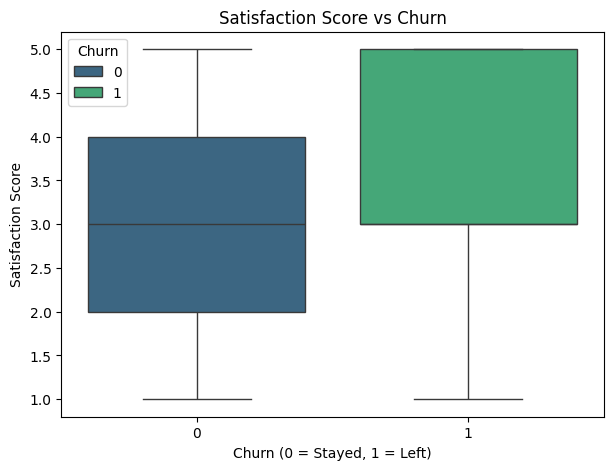

In [14]:
# A — Satisfaction Score vs Churn
plt.figure(figsize=(7,5))
sns.boxplot(x='Churn', y='SatisfactionScore',hue='Churn', data=df, palette='viridis')
plt.title("Satisfaction Score vs Churn")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Score")
plt.show()


In [15]:
df.corr(numeric_only=True)['SatisfactionScore'].sort_values(ascending=False)


SatisfactionScore              1.000000
Churn                          0.100867
NumberOfAddress                0.045459
HourSpendOnApp                 0.037201
DaySinceLastOrder              0.036567
OrderCount                     0.026075
CouponUsed                     0.024968
WarehouseToHome                0.010084
CashbackAmount                 0.008730
CityTier                      -0.010919
Tenure                        -0.015694
NumberOfDeviceRegistered      -0.020112
OrderAmountHikeFromlastYear   -0.022464
Complain                      -0.032608
Name: SatisfactionScore, dtype: float64

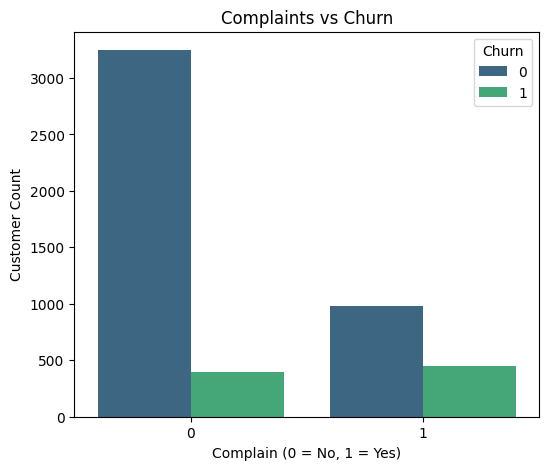

In [16]:
# B — Complaints vs Churn
plt.figure(figsize=(6,5))
sns.countplot(x='Complain', hue='Churn', data=df, palette='viridis')
plt.title("Complaints vs Churn")
plt.xlabel("Complain (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()


📘 Chapter 5 — Correlation Heatmap

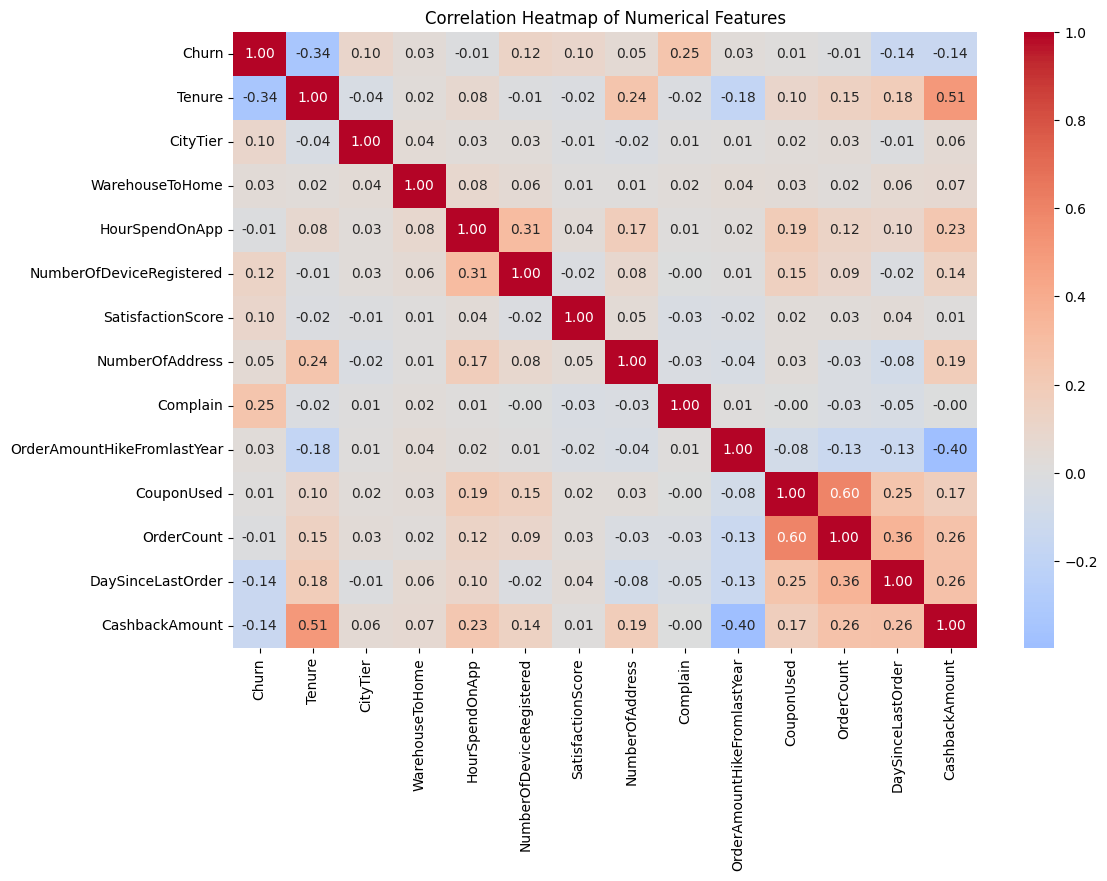

In [17]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
# Positive correlation → higher values increase likelihood of churn
# Negative correlation → higher values decrease likelihood of churn (customers stay longer)

In [18]:
df.corr(numeric_only=True)['SatisfactionScore'].sort_values(ascending=False)


SatisfactionScore              1.000000
Churn                          0.100867
NumberOfAddress                0.045459
HourSpendOnApp                 0.037201
DaySinceLastOrder              0.036567
OrderCount                     0.026075
CouponUsed                     0.024968
WarehouseToHome                0.010084
CashbackAmount                 0.008730
CityTier                      -0.010919
Tenure                        -0.015694
NumberOfDeviceRegistered      -0.020112
OrderAmountHikeFromlastYear   -0.022464
Complain                      -0.032608
Name: SatisfactionScore, dtype: float64

**Customer Churn Prediction – EDA Summary**

Business Objective:
The goal of this project is to find which customers are most likely to stop using an e-commerce platform.
By analyzing customer behavior, payments, and satisfaction, we can help the company improve retention.

1. Dataset Overview
- Total records: 5,630
- Columns: 20
- Target: Churn (0 = stayed, 1 = left)
- About 17% of customers churned – this is realistic for most e-commerce data.
- Missing values were filled using median (for numbers) and mode (for categories).
- The column CustomerID was removed because it doesn’t help prediction.

2. Data Cleaning
- Combined similar category names:
  - “Phone” → “Mobile Phone”
  - “CC” → “Credit Card”
  - “COD” → “Cash on Delivery”
- Removed duplicates and handled missing data.
- Final cleaned dataset: 5,074 rows and 19 columns.

3. Exploratory Data Analysis

Churn Distribution:
- 83% of customers stayed and 17% left.
- The data is slightly imbalanced but fine for modeling.

Tenure vs Churn:
- Customers with shorter tenure are more likely to leave.
- Long-term users are more loyal.

Device Type vs Churn:
- Most customers use Mobile Phones.
- Mobile users show a bit more churn than computer users.
- This may suggest the mobile experience could be improved.

Payment Mode vs Churn:
- Debit Card users have the highest churn.
- Credit Card, UPI, and E-Wallet users tend to stay longer.
- Payment convenience and trust affect loyalty.

Satisfaction Score vs Churn:
- Satisfaction doesn’t strongly predict churn.
- The score may have been recorded before customers left, so it’s not fully reliable.

Complaints vs Churn:
- Customers who raised complaints are much more likely to churn.
- Complaint handling speed and service quality are key retention factors.


Main takeaways:
- Tenure and Complaints are the strongest indicators of churn.
- Cashback and activity reduce the chance of leaving.
- Satisfaction has a weak connection and may depend on other factors.

4. Key Churn Drivers
- New and inactive users are more likely to leave.
- Customers who complain often leave soon after.
- Cashback and smooth digital payments improve loyalty.
- Mobile app users leave slightly more often than computer users.

5. Overall Insights
1. Focus retention on new and inactive customers.
2. Improve customer support and complaint resolution.
3. Offer cashback and digital payment benefits.
4. Optimize mobile experience.


# Phase 4: Feature engineering and Model building

**Step-1:importing the requirements**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from xgboost import XGBClassifier


**step-2:Encoding Categorical Variables**

In [20]:
# applying label Encoding
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
for i in cat_cols:
    df[i]=LabelEncoder().fit_transform(df[i])

**Step-3:Split the data into features and target**

In [21]:
X = df.drop('Churn', axis=1)  # all columns except churn
y = df['Churn']               # only the churn column

# X = data the model learns from
# y = the answer key the model tries to learn to predict'ArithmeticError

# df  →  X (inputs) + y (output)

**Step-4:Splitting data into training and testing parts**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4059, 18)
(4059,)
(1015, 18)
(1015,)


**step-4:Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

# Optional: For XGBoost, scaling is not necessary
# We'll keep both versions for flexibility
X_train_final = X_train  # unscaled (for XGBoost)
X_test_final = X_test


Scaled training data shape: (4059, 18)
Scaled testing data shape: (1015, 18)


In [24]:
df['Churn'].value_counts()

Churn
0    4233
1     841
Name: count, dtype: int64

**Step-5:Train the XGBoost Model**

we used this model because it usually performs better than others.

In [29]:
model=XGBClassifier(n_estimators=300,
                  learning_rate=0.1,
                  max_depth=8,
                  random_state=42,
                  eval_metric='logloss',
                  scale_pos_weight=5)

# Train the model on the training data
model.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_final)
print((y_pred==y_test).value_counts())
model.fit(X_train_final, y_train)

Churn
True     988
False     27
Name: count, dtype: int64


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'



# Phase-6:Model Evaluation

Accuracy: 97.34%
Roc-Auc Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       847
           1       0.92      0.92      0.92       168

    accuracy                           0.97      1015
   macro avg       0.95      0.95      0.95      1015
weighted avg       0.97      0.97      0.97      1015



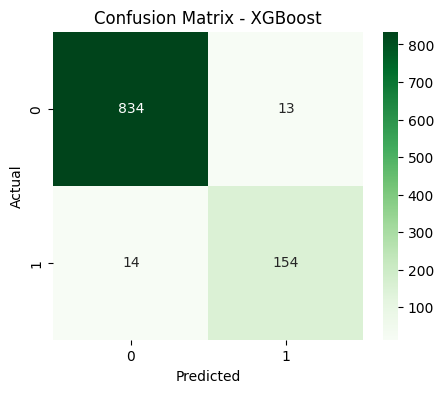

In [26]:
#calculate metrics
accuracy=accuracy_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Roc-Auc Score: {roc_auc:.2f}")

#detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

#confusion matrix visualisation
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
#Saving the model to disk
import pickle

# Replace 'best_model' with your actual model variable name (e.g., model, clf, rf_model, etc.)
pickle.dump(model, open("churn_model.pkl", "wb"))
print(" Model saved successfully as churn_model.pkl")


 Model saved successfully as churn_model.pkl


# Phase-7:Feature Importance

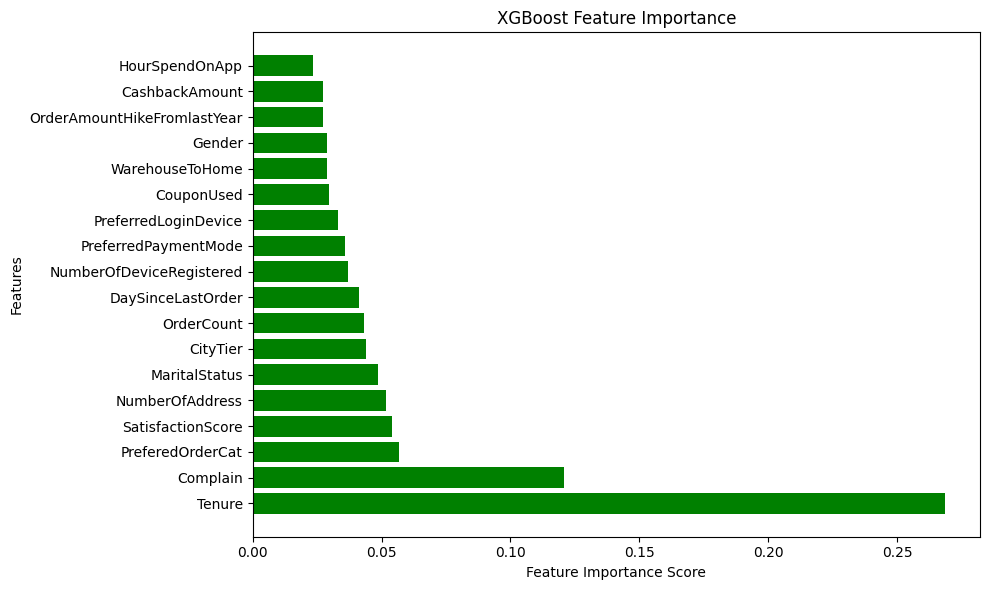


Top 10 Most Important Features:
                     Feature  Importance
0                     Tenure    0.268688
12                  Complain    0.120816
8           PreferedOrderCat    0.056721
9          SatisfactionScore    0.054037
11           NumberOfAddress    0.051740
10             MaritalStatus    0.048600
2                   CityTier    0.043996
15                OrderCount    0.043371
16         DaySinceLastOrder    0.041143
7   NumberOfDeviceRegistered    0.036863


In [28]:
# Get feature importance as a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# Display top features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Phase-8:Business Recommendations
-Early Retention Focus – Create loyalty programs targeting new users with low tenure.

-Improve Customer Support – Monitor and resolve complaints faster to reduce churn.

-Engagement Boosting – Encourage more frequent logins, orders, and multi-device usage.

-Satisfaction Feedback Loop – Regularly survey customers and address pain points quickly.

-Personalized Offers – Reward long-term customers with cashback or discounts to improve lifetime value.